In [1]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
xlsx_file = pd.ExcelFile('dunnhumby _Breakfast-at-the-Frat/dunnhumby - Breakfast at the Frat.xlsx')


In [3]:
store_lookup = pd.read_excel(xlsx_file, sheet_name=xlsx_file.sheet_names[1], header=1, usecols=8)
products_lookup = pd.read_excel(xlsx_file, sheet_name=xlsx_file.sheet_names[2], header=1, usecols=5)
transaction_data = pd.read_excel(xlsx_file, sheet_name=xlsx_file.sheet_names[3], header=1, usecols=11)


# Products data

In [4]:
products_lookup.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


The products table consists of 58 observations with 6 variables. The 6 variables describe the characteristics of each product.There are 
- ***UPC*** - (Universal Product Code) product specific identifier,
- ***DESCRIPTION*** - prodcut description, 
- ***MANUFACTURER*** - product manufacturer, 
- ***CATEGORY*** - product category,
- ***SUB_CATEGORY*** - product subcategory,
- ***PRODUCT_SIZE*** - package size or quantity of product. 

In [5]:
products_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
UPC             58 non-null int64
DESCRIPTION     58 non-null object
MANUFACTURER    58 non-null object
CATEGORY        58 non-null object
SUB_CATEGORY    58 non-null object
PRODUCT_SIZE    58 non-null object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


The dataset does not contain Na values.

In [6]:
products_lookup.isna().any()

UPC             False
DESCRIPTION     False
MANUFACTURER    False
CATEGORY        False
SUB_CATEGORY    False
PRODUCT_SIZE    False
dtype: bool

The presentation of unique values in each column of a table looks like this:

In [7]:
for column in products_lookup.columns:
    print('%s column has %s unique values'%(column, len(products_lookup[column].unique())))

UPC column has 58 unique values
DESCRIPTION column has 55 unique values
MANUFACTURER column has 17 unique values
CATEGORY column has 4 unique values
SUB_CATEGORY column has 7 unique values
PRODUCT_SIZE column has 31 unique values


There are no duplicates in the ***UPC*** column.

In [8]:
for id in products_lookup.UPC.unique():
    if products_lookup.UPC.value_counts()[id] >1 :
        print('product: {},  amount = {}'.format(id, products_lookup.UPC.value_counts()[id]))

The products are divided into 7 sub-categories:
- *BAG SNACKS* into *PRETZELS*;
- *ORAL HYGIENE PRODUCTS* into *MOUTHWASHES (ANTISEPTIC)* and *MOUTHWASH/RINSES AND SPRAYS*;
- *COLD CEREAL* into *ALL FAMILY CEREAL*, *ADULT CEREAL*, *KIDS CEREAL*;
- *FROZEN PIZZA* into *PIZZA/PREMIUM*.

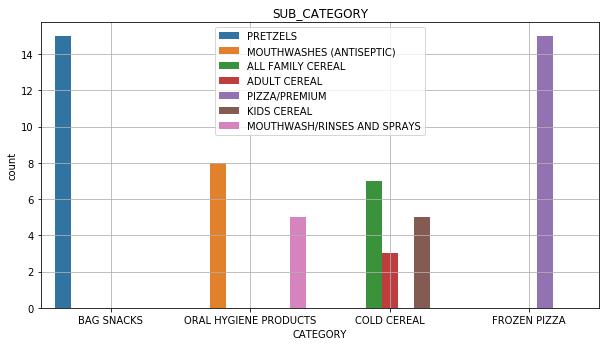

In [9]:
plt.figure(num=None, figsize=(10, 5.25))
sns.countplot('CATEGORY', hue='SUB_CATEGORY', data=products_lookup)
plt.legend(loc='upper center')
plt.grid(True)
plt.title('SUB_CATEGORY')
plt.show()


There are 17 manufacturers who sell the products mentioned above. They are:

In [10]:
for manufacturer in products_lookup['MANUFACTURER'].unique():
    print(manufacturer)

PRIVATE LABEL
GENERAL MI
KING
FRITO LAY
QUAKER
HOME RUN
COLGATE
P & G
KELLOGG
CHATTEM
SHULTZ
MKSL
TOMBSTONE
TONYS
SNYDER S
WARNER
POST FOODS


The *'PRIVATE LABEL'* manufacturer has products in all categories.

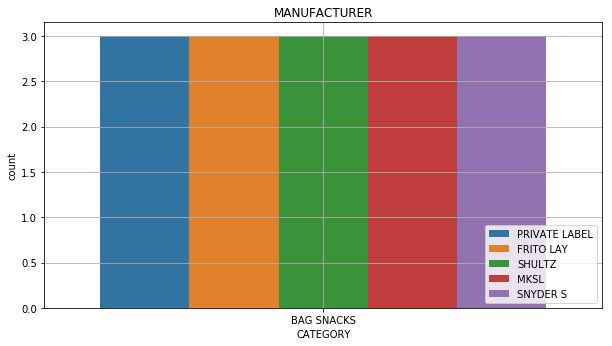

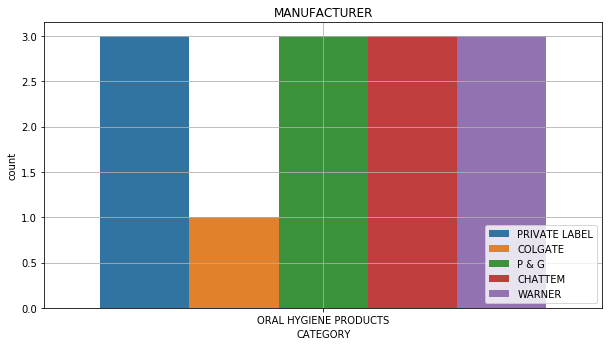

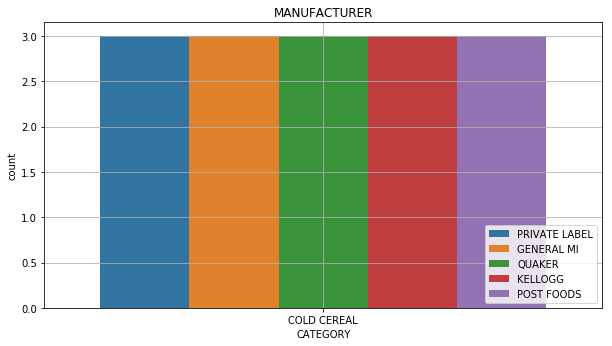

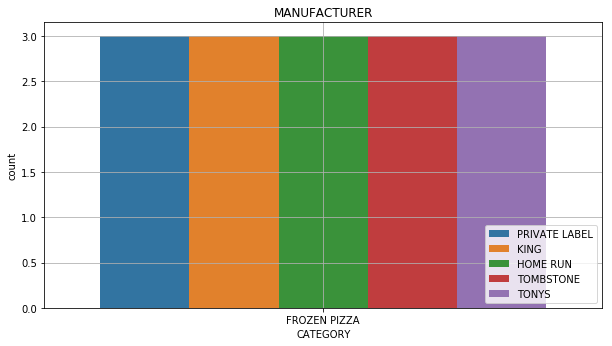

In [11]:
for cat in products_lookup['CATEGORY'].unique():
    plt.figure(num=None, figsize=(10, 5.25))
    sns.countplot('CATEGORY', hue='MANUFACTURER', data=products_lookup[products_lookup['CATEGORY'] == cat])
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.title('MANUFACTURER')
    plt.show()


The size distribution of the product is shown below.

4 different product sizes


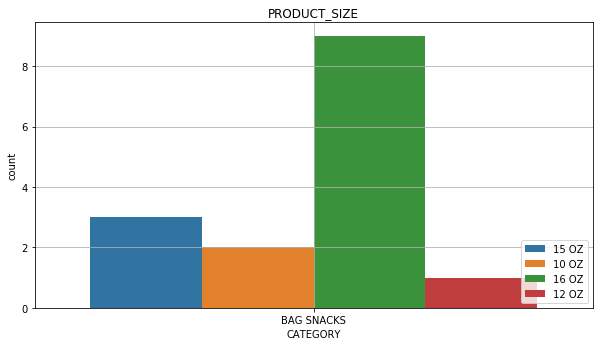

6 different product sizes


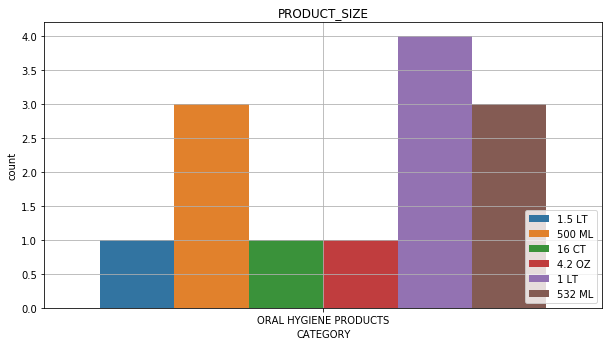

9 different product sizes


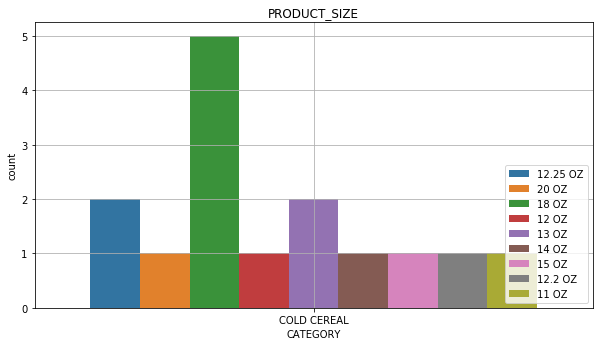

14 different product sizes


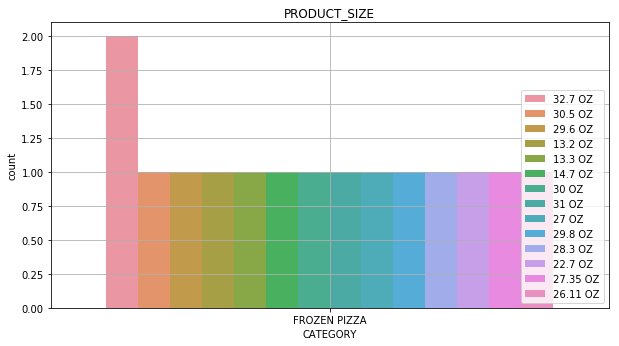

In [12]:
for cat in products_lookup['CATEGORY'].unique():
    print('{} different product sizes'.format(len(products_lookup[products_lookup['CATEGORY'] == cat].PRODUCT_SIZE.unique())))
    plt.figure(num=None, figsize=(10, 5.25))
    sns.countplot('CATEGORY', hue='PRODUCT_SIZE', data=products_lookup[products_lookup['CATEGORY'] == cat])
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.title('PRODUCT_SIZE')
    plt.show()


> ## Summary:
> - products data contains 58 products in 4 different categories
> - *BAG SNACKS* and *FROZEN PIZZA* categories have only 1 sub-category, *ORAL HYGIENE PRODUCTS* has 2 sub-categories and *COLD > CEREAL* - 3 sub-categories.
> - there are 17 manufacturers who sell the products.
> - manufacturer *'PRIVATE LABEL'* has products in all the four categories.
> - *FROZEN PIZZA* category has the largest number of different product packaging sizes.

### -------------------------------------------------------------------------------------------------------------------------------------------------------

# Stores data

In [13]:
store_lookup.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308


The stores table consists of 79 observations with 9 variables. The 9 variables describe the characteristics of each store.There are 
- ***STORE_ID*** - store id,
- ***STORE_NAME*** - name of the store, 
- ***ADDRESS_CITY_NAME*** - city name (where the store exists), 
- ***ADDRESS_STATE_PROV_CODE*** - state code,
- ***MSA_CODE*** - Metropolitan Statistical Area code,
- ***SEG_VALUE_NAME*** - segment the store belongs to,
- ***PARKING_SPACE_QTY*** - parking size area available in the stores,
- ***SALES_AREA_SIZE_NUM*** - square footage of store,
- ***AVG_WEEKLY_BASKETS*** - number of average weekly baskets sold in the store.

In [14]:
store_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
STORE_ID                   79 non-null int64
STORE_NAME                 79 non-null object
ADDRESS_CITY_NAME          79 non-null object
ADDRESS_STATE_PROV_CODE    79 non-null object
MSA_CODE                   79 non-null int64
SEG_VALUE_NAME             79 non-null object
PARKING_SPACE_QTY          27 non-null float64
SALES_AREA_SIZE_NUM        79 non-null int64
AVG_WEEKLY_BASKETS         79 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 5.6+ KB


The column ***PARKING_SPACE_QTY*** has 27 of not-Na values in the data. This is only 34% of the data. So, this column will be deleted, because it basically consists of Na values.

In [15]:
store_lookup.isna().any()

STORE_ID                   False
STORE_NAME                 False
ADDRESS_CITY_NAME          False
ADDRESS_STATE_PROV_CODE    False
MSA_CODE                   False
SEG_VALUE_NAME             False
PARKING_SPACE_QTY           True
SALES_AREA_SIZE_NUM        False
AVG_WEEKLY_BASKETS         False
dtype: bool

The presentation of unique values in each column of a table looks like this:

In [16]:
for column in store_lookup.columns:
    print('%s column has %s unique values'%(column, len(store_lookup[column].unique())))

STORE_ID column has 77 unique values
STORE_NAME column has 73 unique values
ADDRESS_CITY_NAME column has 51 unique values
ADDRESS_STATE_PROV_CODE column has 4 unique values
MSA_CODE column has 9 unique values
SEG_VALUE_NAME column has 3 unique values
PARKING_SPACE_QTY column has 25 unique values
SALES_AREA_SIZE_NUM column has 73 unique values
AVG_WEEKLY_BASKETS column has 77 unique values


There are duplicates in the ***STORE_ID*** column. Stores with identifiers 4503 and 17627 are repeated twice.

In [17]:
for id in store_lookup.STORE_ID.unique():
    if store_lookup.STORE_ID.value_counts()[id] >1 :
        print('store: {} {},  amount = {}'.format(id, 
                                                    store_lookup.loc[store_lookup.STORE_ID == id, 'STORE_NAME'].unique(),
                                                    store_lookup.STORE_ID.value_counts()[id]))

store: 4503 ['ROCKWALL'],  amount = 2
store: 17627 ['FLOWER MOUND'],  amount = 2


There are duplicates in the ***STORE_NAME*** column. Stores *'HOUSTON', 'ROCKWALL'* are repeated four times and stores *'FLOWER MOUND', 'MIDDLETOWN'* - twice.

In [18]:
for name in store_lookup.STORE_NAME.unique():
    if store_lookup.STORE_NAME.value_counts()[name] >1 :
        print('store: {},  amount = {}'.format(name, store_lookup.STORE_NAME.value_counts()[name]))

store: HOUSTON,  amount = 4
store: ROCKWALL,  amount = 2
store: FLOWER MOUND,  amount = 2
store: MIDDLETOWN,  amount = 2


There are 2 or more stores in the 12 following cities.

In [19]:
i=1
for city in store_lookup.ADDRESS_CITY_NAME.unique(): 
    if len(store_lookup[store_lookup.ADDRESS_CITY_NAME == city].STORE_ID.unique()) > 1:
        print('{}. city {} has {} stores'.format(i, city,
              len(store_lookup[store_lookup.ADDRESS_CITY_NAME == city].STORE_ID.unique())))
        i = i+1

1. city CINCINNATI has 9 stores
2. city MCKINNEY has 2 stores
3. city HOUSTON has 8 stores
4. city DAYTON has 2 stores
5. city SUGAR LAND has 2 stores
6. city COVINGTON has 2 stores
7. city KATY has 2 stores
8. city HAMILTON has 2 stores
9. city MAINEVILLE has 2 stores
10. city MIDDLETOWN has 3 stores
11. city KETTERING has 2 stores
12. city LOVELAND has 2 stores


The data contains only 4 different states. Below is the number of stores available in each of these states. Most stores are located in 2 states: TX and OH

In [20]:
pd.crosstab(store_lookup.STORE_ID, store_lookup.ADDRESS_STATE_PROV_CODE).sum()

ADDRESS_STATE_PROV_CODE
IN     1
KY     4
OH    31
TX    43
dtype: int64

The data consists 9 unique ***MSA*** codes. In the geographic region, where the code is MSA 17140, there are 29 stores, in the code 26420 there are about 21 stores, and in the code 19100 - about 19 stores.

In [21]:
pd.crosstab(store_lookup.STORE_ID, store_lookup.MSA_CODE).sum()

MSA_CODE
13140     1
17140    29
17780     1
19100    19
19380     5
26420    21
43300     1
44220     1
47540     1
dtype: int64

In the ***SEG_VALUE_NAME*** column, stores are divided into three segments: *'MAINSTREAM'*, *'UPSCALE'* and *'VALUE'*. 

54% of stores are in *'MAINSTREAM'* segment, 22% in *'UPSCALE'* segment and 24% of stores in the *'VALUE'* segment.

In [22]:
pd.crosstab(store_lookup.STORE_ID, store_lookup.SEG_VALUE_NAME).sum() 

SEG_VALUE_NAME
MAINSTREAM    43
UPSCALE       17
VALUE         19
dtype: int64

Statistics for the ***SALES_AREA_SIZE_NUM*** column looks like this:

In [23]:
store_lookup.SALES_AREA_SIZE_NUM.describe()

count       79.000000
mean     49145.164557
std      13512.452153
min      10788.000000
25%      43067.500000
50%      48594.000000
75%      55200.500000
max      86517.000000
Name: SALES_AREA_SIZE_NUM, dtype: float64

The distribution of this column is plotted below.

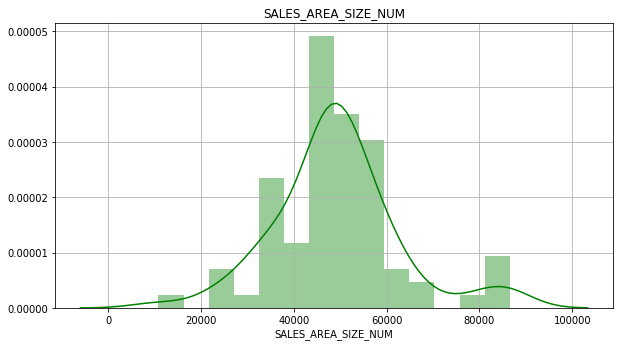

In [24]:
plt.figure(num=None, figsize=(10, 5.25))
sns.distplot(store_lookup.SALES_AREA_SIZE_NUM, bins=None, kde=True, color='green')
plt.title('SALES_AREA_SIZE_NUM')
plt.grid(True)
plt.show()

In the *'VALUE'* segment the area size is the smallest. Higher number of area size can be found in the *'UPSCALE'* segment.

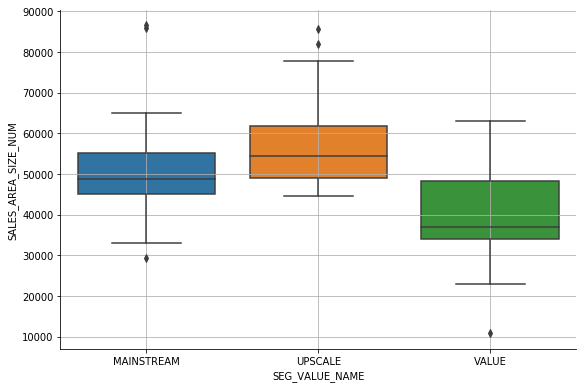

In [25]:
sns.catplot(x="SEG_VALUE_NAME", y="SALES_AREA_SIZE_NUM", data=store_lookup, kind="box", height=5.5, aspect=1.5)
plt.grid(True)
plt.show()

Statistics for the ***AVG_WEEKLY_BASKETS*** column looks like this:

In [26]:
store_lookup.AVG_WEEKLY_BASKETS.describe()

count       79.000000
mean     24146.806232
std       8720.396844
min      10434.705128
25%      17522.432692
50%      24567.750000
75%      29186.262821
max      54052.519231
Name: AVG_WEEKLY_BASKETS, dtype: float64

The distribution of this column is plotted below.

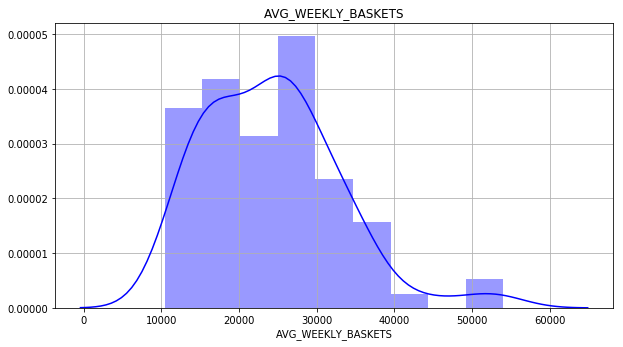

In [27]:
plt.figure(num=None, figsize=(10, 5.25))
sns.distplot(store_lookup.AVG_WEEKLY_BASKETS, bins=None, kde=True, color='blue')
plt.title('AVG_WEEKLY_BASKETS')
plt.grid(True)
plt.show()

In the *'VALUE'* segment the average number of weekly baskets in the store is the smallest.

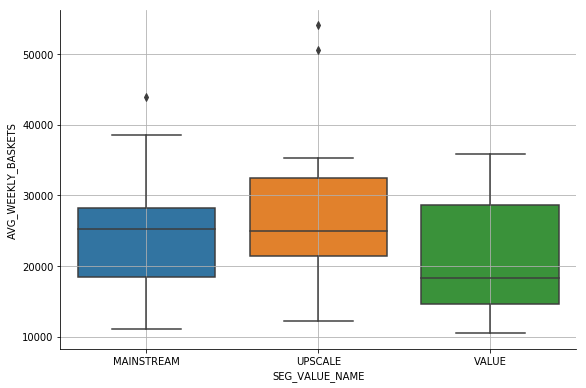

In [28]:
sns.catplot(x="SEG_VALUE_NAME", y="AVG_WEEKLY_BASKETS", data=store_lookup, kind="box", height=5.5, aspect=1.5)
plt.grid(True)
plt.show()

> ## Summary:
> - ***PARKING_SPACE_QTY*** column has 66% Na values,because it is not considered for further analysis;
> - stores data contains 77 different stores;
> - stores with identifiers 4503 and 17627 are repeated twice in the data ;
> - there are duplicates in the ***STORE_NAME*** column;
> - there are 2 or more stores in the 12 following cities;
> - the data contains only 4 different states. State TX has the greatest number of stores located;
> - the data consists 9 unique MSA codes. MSA Code 17140 has 29 stores, code 26420 has 21 stores and code 19100 has about 19 stores in them;
> - 54% of stores are in *'MAINSTREAM'* segment, 22% in *'UPSCALE'* segment and 24% of stores in the *'VALUE'* segment;
> - the area size and  number of average weekly baskets are higher in the *'UPSCALE'* category, although % of stores in this segment is least.


### -------------------------------------------------------------------------------------------------------------------------------------------------------

# Transaction data

In [29]:
transaction_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
3,2009-01-14,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1
4,2009-01-14,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0


The transaction table consists of 524950  observations with 12 variables. The 12 variables describe the transaction data of each product in each store.There are 
- ***WEEK_END_DATE*** - end date of the week,
- ***STORE_NUM*** - store id, 
- ***UPC*** - (Universal Product Code) product specific identifier, 
- ***UNITS*** - units sold,
- ***VISITS*** - the number of unique baskets that include the product,
- ***HHS*** - Number of purchasing households,
- ***SPEND*** - total spend (i.e., $ sales),
- ***PRICE*** - actual amount charged for the product at shelf,
- ***BASE_PRICE*** - base price of item,
- ***FEATURE*** - product was in in-store circular,
- ***DISPLAY*** - product was a part of in-store promotional display,
- ***TPR_ONLY*** - temporary price reduction only (product was reduced in price but not on display or in an advertisment).

In [30]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524950 entries, 0 to 524949
Data columns (total 12 columns):
WEEK_END_DATE    524950 non-null datetime64[ns]
STORE_NUM        524950 non-null int64
UPC              524950 non-null int64
UNITS            524950 non-null int64
VISITS           524950 non-null int64
HHS              524950 non-null int64
SPEND            524950 non-null float64
PRICE            524927 non-null float64
BASE_PRICE       524765 non-null float64
FEATURE          524950 non-null int64
DISPLAY          524950 non-null int64
TPR_ONLY         524950 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 48.1 MB


The columns ***PRICE*** and ***BASE_PRICE*** both have Nan values. These rows will be deleted.

In [31]:
transaction_data.isna().any()

WEEK_END_DATE    False
STORE_NUM        False
UPC              False
UNITS            False
VISITS           False
HHS              False
SPEND            False
PRICE             True
BASE_PRICE        True
FEATURE          False
DISPLAY          False
TPR_ONLY         False
dtype: bool

## -------------------------------------------------------------------------------------------------------------------------

In [32]:
df = pd.merge(products_lookup, transaction_data, how='inner', on='UPC')
df = df.rename(columns={'STORE_NUM': 'STORE_ID'})
df = pd.merge(df, store_lookup, how='inner', on='STORE_ID')
df = df.drop(['PARKING_SPACE_QTY'], axis=1)
df = df.dropna(axis=0)

After combining  the Products , Stores and Transactions tables (using the UPC Code and Store ID keys) , deleting PARKING_SPACE_QTY column and dropping Na values from table, the resulting data has 24 variables. 

In [33]:
df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,WEEK_END_DATE,STORE_ID,UNITS,VISITS,...,FEATURE,DISPLAY,TPR_ONLY,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-14,367,13,13,...,0,0,1,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-21,367,24,23,...,0,0,1,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
2,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-01-28,367,7,7,...,0,0,0,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
3,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-02-04,367,12,12,...,0,0,0,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051
4,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,2009-02-11,367,16,14,...,0,0,0,15TH & MADISON,COVINGTON,KY,17140,VALUE,24721,12706.532051


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538435 entries, 0 to 538642
Data columns (total 24 columns):
UPC                        538435 non-null int64
DESCRIPTION                538435 non-null object
MANUFACTURER               538435 non-null object
CATEGORY                   538435 non-null object
SUB_CATEGORY               538435 non-null object
PRODUCT_SIZE               538435 non-null object
WEEK_END_DATE              538435 non-null datetime64[ns]
STORE_ID                   538435 non-null int64
UNITS                      538435 non-null int64
VISITS                     538435 non-null int64
HHS                        538435 non-null int64
SPEND                      538435 non-null float64
PRICE                      538435 non-null float64
BASE_PRICE                 538435 non-null float64
FEATURE                    538435 non-null int64
DISPLAY                    538435 non-null int64
TPR_ONLY                   538435 non-null int64
STORE_NAME                 538435 no

Cities with the highest number of transactions (by MSA) are the following:

In [35]:
pd.crosstab(df.MSA_CODE , df.ADDRESS_CITY_NAME )

ADDRESS_CITY_NAME,ALLEN,ARLINGTON,BAYTOWN,BEAUMONT,BLUE ASH,CARROLLTON,CINCINNATI,CLUTE,COLLEGE STATION,COVINGTON,...,ROCKWALL,SAINT MARYS,SHERMAN,SOUTHLAKE,SPRINGFIELD,SUGAR LAND,THE WOODLANDS,VANDALIA,WEST CHESTER,WOODLANDS
MSA_CODE,,,,,,,,,,,,,,,,,,,,,
13140,0,0,0,6613,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17140,0,0,0,0,7968,0,62728,0,0,13554,...,0,0,0,0,0,0,0,0,7675,0
17780,0,0,0,0,0,0,0,0,6085,0,...,0,0,0,0,0,0,0,0,0,0
19100,6979,5799,0,0,0,6745,0,0,0,0,...,13812,0,0,6757,0,0,0,0,0,0
19380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7815,0,0
26420,0,0,6113,0,0,0,0,6659,0,0,...,0,0,0,0,0,13223,6810,0,0,6460
43300,0,0,0,0,0,0,0,0,0,0,...,0,0,6138,0,0,0,0,0,0,0
44220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7342,0,0,0,0,0
47540,0,0,0,0,0,0,0,0,0,0,...,0,7226,0,0,0,0,0,0,0,0


In [36]:
pd.crosstab(df.MSA_CODE , df.ADDRESS_CITY_NAME ).sum().sort_values(ascending=False).head(10)

ADDRESS_CITY_NAME
CINCINNATI      62728
HOUSTON         50278
MIDDLETOWN      22881
MAINEVILLE      15333
LOVELAND        14966
HAMILTON        14913
DAYTON          13855
ROCKWALL        13812
FLOWER MOUND    13574
COVINGTON       13554
dtype: int64

The number of transactions in each category of different manufacturers looks like this:

In [37]:
pd.crosstab(df.MANUFACTURER , df.CATEGORY )

CATEGORY,BAG SNACKS,COLD CEREAL,FROZEN PIZZA,ORAL HYGIENE PRODUCTS
MANUFACTURER,,,,
CHATTEM,0,0,0,22815
COLGATE,0,0,0,1468
FRITO LAY,33057,0,0,0
GENERAL MI,0,36884,0,0
KELLOGG,0,36766,0,0
KING,0,0,12006,0
MKSL,13736,0,0,0
P & G,0,0,0,30677
POST FOODS,0,31917,0,0


In [38]:
pd.crosstab(df.MANUFACTURER , df.CATEGORY ).sum().sort_values(ascending=False)

CATEGORY
COLD CEREAL              174128
BAG SNACKS               130106
ORAL HYGIENE PRODUCTS    119880
FROZEN PIZZA             114321
dtype: int64

The number of transactions per subcategory of products in each category are the following:

In [39]:
pd.crosstab(df.CATEGORY, df.SUB_CATEGORY )

SUB_CATEGORY,ADULT CEREAL,ALL FAMILY CEREAL,KIDS CEREAL,MOUTHWASH/RINSES AND SPRAYS,MOUTHWASHES (ANTISEPTIC),PIZZA/PREMIUM,PRETZELS
CATEGORY,,,,,,,
BAG SNACKS,0,0,0,0,0,0,130106
COLD CEREAL,33856,84157,56115,0,0,0,0
FROZEN PIZZA,0,0,0,0,0,114321,0
ORAL HYGIENE PRODUCTS,0,0,0,36839,83041,0,0


In [40]:
pd.crosstab(df.CATEGORY, df.SUB_CATEGORY).sum().sort_values(ascending=False)

SUB_CATEGORY
PRETZELS                       130106
PIZZA/PREMIUM                  114321
ALL FAMILY CEREAL               84157
MOUTHWASHES (ANTISEPTIC)        83041
KIDS CEREAL                     56115
MOUTHWASH/RINSES AND SPRAYS     36839
ADULT CEREAL                    33856
dtype: int64

Transactions are more in the *'Mainstream'* segment followed by *'Upstream'*.

In [41]:
pd.crosstab(df.STORE_NAME, df.SEG_VALUE_NAME ).T

STORE_NAME,15TH & MADISON,ANDERSON TOWNE CTR,ANTOINE TOWN CENTER,AT EASTEX FRWY,AT WARD ROAD,BEAUMONT,BLUE ASH,CARROLLTON,CINCINNATI,CROWLEY,...,THE WOODLANDS,TOWN & COUNTRY,TYLERSVILLE,VANDALIA,WALNUT HILLS/PEEBLES,WARSAW AVENUE,WHIPP & BIGGER,WOOD FOREST S/C,WOODLANDS,WOODLAWN
SEG_VALUE_NAME,,,,,,,,,,,,,,,,,,,,,
MAINSTREAM,0,0,0,0,0,6613,0,6745,7934,6615,...,0,0,7675,7815,0,0,6989,0,0,7615
UPSCALE,0,8045,0,0,0,0,7968,0,0,0,...,6810,6050,0,0,0,0,0,0,6460,0
VALUE,5943,0,6182,5476,6113,0,0,0,0,0,...,0,0,0,0,4721,6955,0,6290,0,0


In [42]:
pd.crosstab(df.STORE_NAME, df.SEG_VALUE_NAME ).sum().sort_values(ascending=False)

SEG_VALUE_NAME
MAINSTREAM    301696
UPSCALE       121808
VALUE         114931
dtype: int64

Below are statistics on the number of items sold for all products:

In [43]:
df.UNITS.describe()

count    538435.000000
mean         19.626393
std          29.851551
min           1.000000
25%           4.000000
50%          11.000000
75%          24.000000
max        1800.000000
Name: UNITS, dtype: float64

***VISITS*** the number of unique baskets that contain the product. The statistics for this column looks like this:

In [44]:
df.UNITS.describe()

count    538435.000000
mean         19.626393
std          29.851551
min           1.000000
25%           4.000000
50%          11.000000
75%          24.000000
max        1800.000000
Name: UNITS, dtype: float64

Here are statistics of ***HHS*** column.

In [45]:
df.HHS.describe()

count    538435.000000
mean         16.798889
std          24.102945
min           1.000000
25%           4.000000
50%           9.000000
75%          21.000000
max        1286.000000
Name: HHS, dtype: float64

The statistics for ***SPEND*** column looks like this:

In [46]:
df.SPEND.describe()

count    538435.000000
mean         53.279240
std          68.014038
min           0.000000
25%          13.470000
50%          32.130000
75%          67.830000
max        2952.000000
Name: SPEND, dtype: float64

Statistics for the ***PRICE*** and ***BASE_PRICE*** columns (the actual amount charged for the product on the shelf):

In [47]:
df.PRICE.describe()

count    538435.000000
mean          3.385317
std           1.560662
min           0.000000
25%           2.370000
50%           2.990000
75%           4.490000
max          11.460000
Name: PRICE, dtype: float64

In [48]:
df.BASE_PRICE.describe()

count    538435.000000
mean          3.605310
std           1.632824
min           0.550000
25%           2.500000
50%           3.180000
75%           4.590000
max          11.460000
Name: BASE_PRICE, dtype: float64

The distribution of ***PRICE*** and ***BASE_PRICE*** across all stores is shown below:

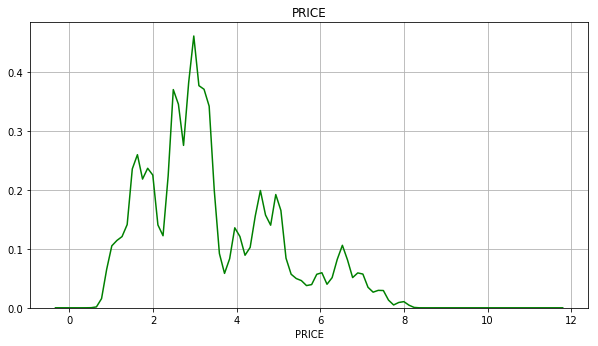

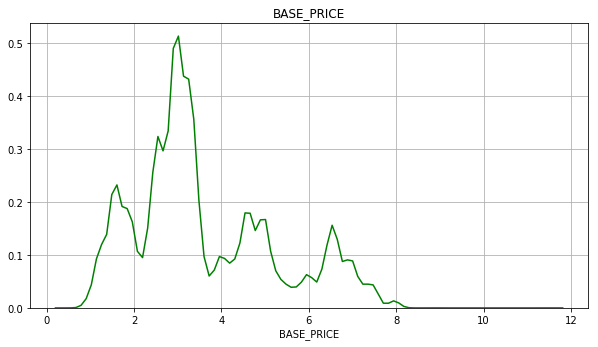

In [49]:
for col in ['PRICE', 'BASE_PRICE']:
    plt.figure(num=None, figsize=(10, 5.25))
    sns.distplot(df[col], bins=None, kde=True, color='green', hist=False)
    plt.title(col)
    plt.grid(True)
    plt.show()

The distribution of all the ***UNITS***, ***VISITS***, ***HHS***, ***SPEND*** columns have similar patterns.

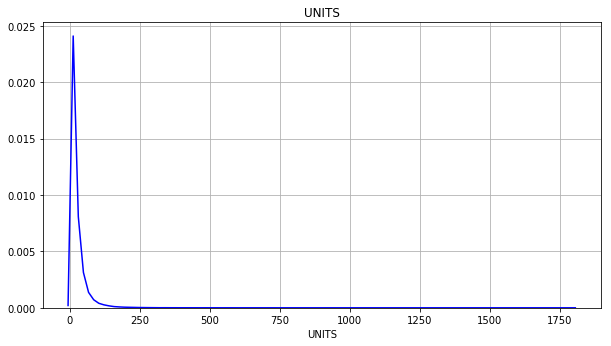

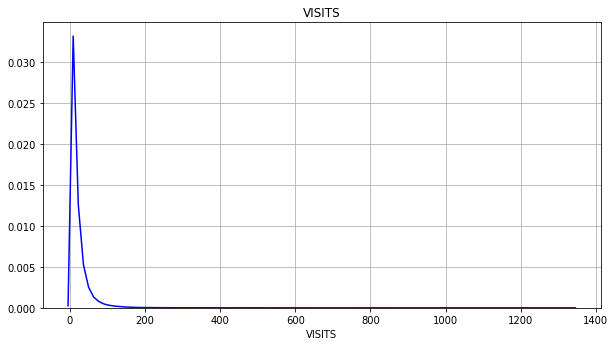

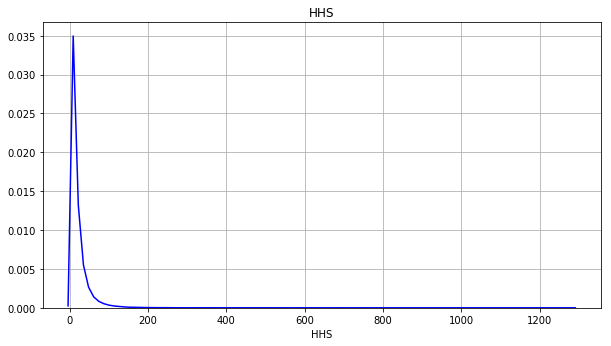

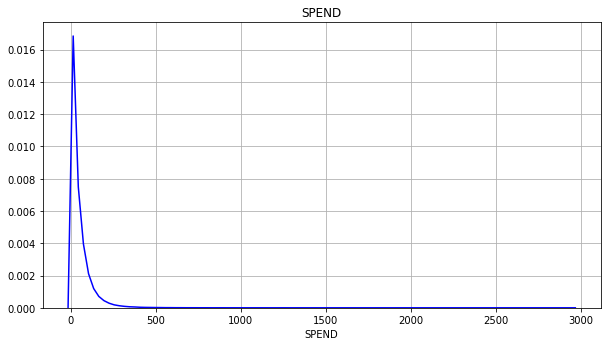

In [50]:
for col in ['UNITS', 'VISITS', 'HHS', 'SPEND']:
    plt.figure(num=None, figsize=(10, 5.25))
    sns.distplot(df[col], bins=None, kde=True, color='blue', hist=False)
    plt.title(col)
    plt.grid(True)
    plt.show()

Ratio of transactions for promotion and non-promotion

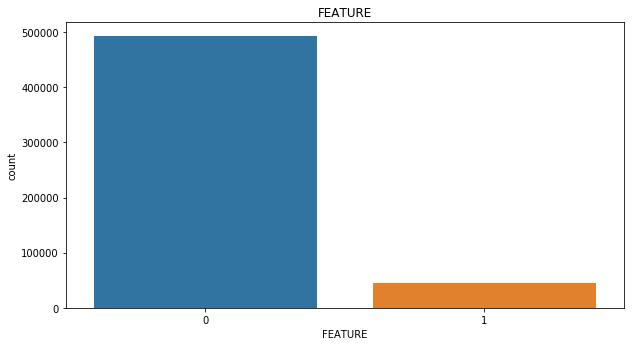

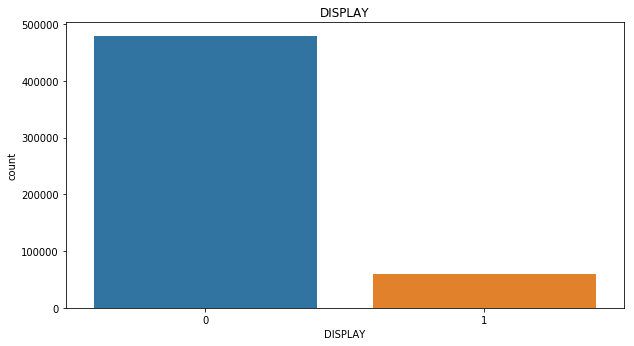

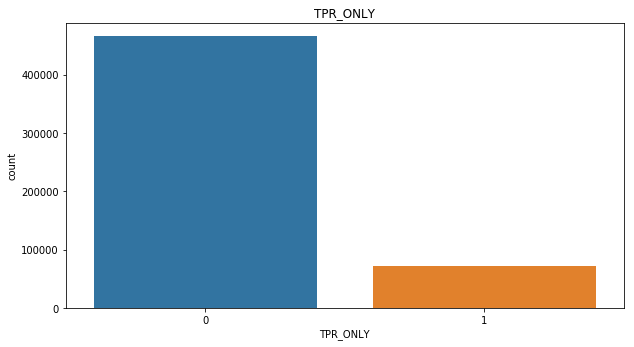

In [51]:
for col in ['FEATURE', 'DISPLAY', 'TPR_ONLY']:
    plt.figure(figsize=(10, 5.25))
    ax = sns.countplot(df[col])
    plt.title(col)
    plt.show()

Distribution of price across promotions and non-promotion

<Figure size 720x378 with 0 Axes>

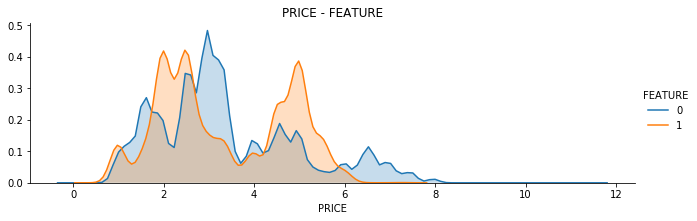

<Figure size 720x378 with 0 Axes>

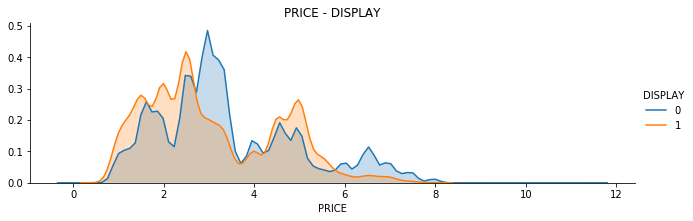

<Figure size 720x378 with 0 Axes>

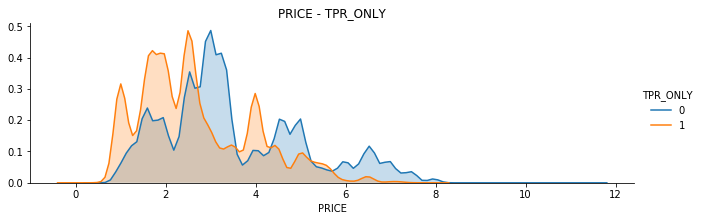

In [52]:
for col in ['FEATURE', 'DISPLAY', 'TPR_ONLY']:
    #plot_distribution(df, 'PRICE', col)
    plt.figure(figsize=(10, 5.25))
    facet = sns.FacetGrid(df, hue=col, aspect=3)
    facet.map(sns.kdeplot, "PRICE", shade=True)
    facet.add_legend()
    plt.title("PRICE - {}".format(col))
    plt.show()

<Figure size 864x720 with 0 Axes>

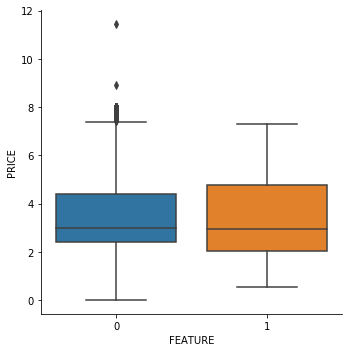

<Figure size 864x720 with 0 Axes>

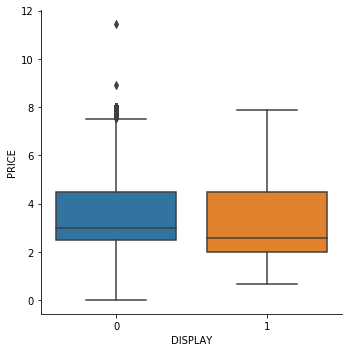

<Figure size 864x720 with 0 Axes>

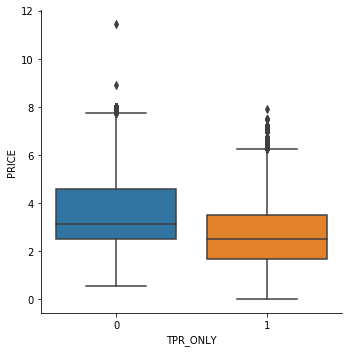

In [53]:
for col in ['FEATURE', 'DISPLAY', 'TPR_ONLY']:
    plt.figure(figsize=(12, 10))
    sns.catplot(y='PRICE', x=col, data=df, kind="box")
    plt.show()

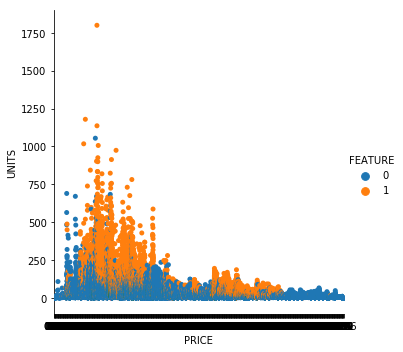

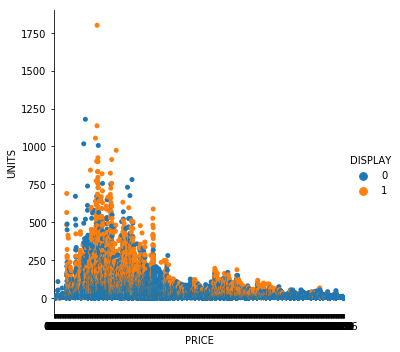

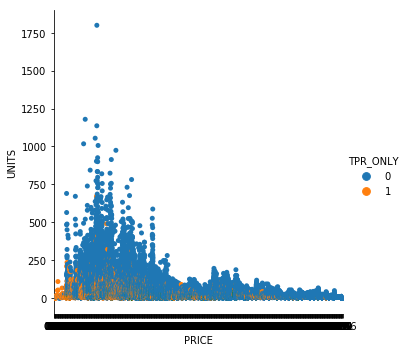

In [54]:
for col in ['FEATURE', 'DISPLAY', 'TPR_ONLY']:
    sns.catplot(x="PRICE", y="UNITS", hue=col, data=df)
    plt.show()

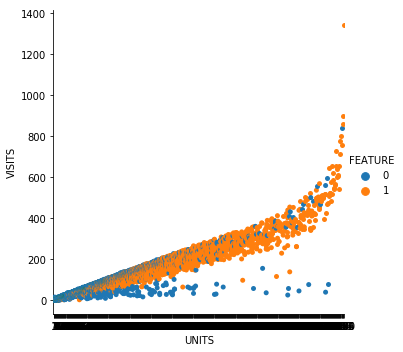

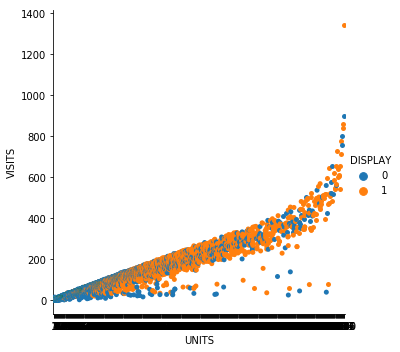

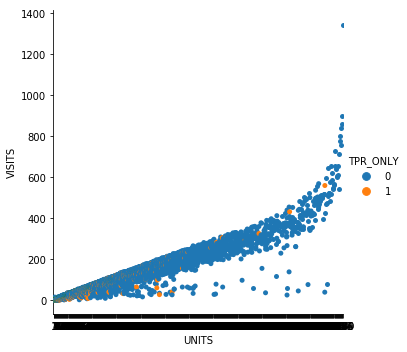

In [55]:
for col in ['FEATURE', 'DISPLAY', 'TPR_ONLY']:
    sns.catplot(x="UNITS", y='VISITS', hue=col, data=df)
    plt.show()

> ## Summary:
 - the columns ***PRICE*** and ***BASE_PRICE*** both have Na values. So, these rows have been deleted;
 - the cities of *CINCINNATI* and *HOUSTON* are the leaders in the number of transactions; 
 - the category "COLD CEREAL" is the leader in the number of transactions; 
 - the number of transactions per subcategory of products is highest in categories that have only one category; 
 - transactions are more in the *'Mainstream'* segment followed by *'Upstream'*; 
 - about 50% of total transactions have sales less than \$50; 
 - average product price is \$3; 
 - the ***UNITS***, ***VISITS***, ***HHS***, ***SPEND*** columns have similar patterns;
 - more transactions occur during non-promotion;
 - more units are sold for the "Display" and "Feature" promotion.
 